In [332]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [333]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 데이터셋 준비

In [334]:

df = pd.read_csv('./train_메뉴제외.csv')


In [335]:
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,...,석식결식,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2163.0,...,1832.0,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2059.0,...,1499.0,0.0,1.7,0.0,0.0,2.4,0.0,0.0,0,0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2254.0,...,1681.0,0.0,3.2,0.0,0.0,3.0,0.0,0.0,0,0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,1922.0,...,1397.0,0.0,3.7,0.0,0.0,4.0,0.0,0.0,0,0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2108.0,...,1778.0,0.0,6.3,0.0,0.0,5.7,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2315.0,...,1894.0,0.0,4.8,0.0,0.0,6.7,0.0,404.0,0,0
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,1847.0,...,1494.0,0.0,9.1,0.0,0.0,9.6,0.0,400.0,0,0
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2176.0,...,1959.0,0.0,8.4,0.0,0.0,8.0,0.0,346.0,1,0
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,1780.0,...,1278.0,0.0,11.3,0.0,0.0,10.2,0.0,437.0,0,1


In [336]:
ldf = df.drop(['석식계', '석식결식', '식사가능인원', '중식결식', '석식강수여부', '석식기온', '본사시간외근무명령서승인건수', '석식강수량'], axis=1)
ldf

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,확진자수,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,0.0,1039.0,0.0,3.0,0.0,0.0,0,1
1,2016-02-02,화,2601,50,173,0.0,867.0,0.0,1.7,0.0,0.0,0,0
2,2016-02-03,수,2601,56,180,0.0,1017.0,0.0,3.2,0.0,0.0,0,0
3,2016-02-04,목,2601,104,220,0.0,978.0,0.0,3.7,0.0,0.0,0,0
4,2016-02-05,금,2601,278,181,0.0,925.0,0.0,6.3,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,391.0,1093.0,0.0,4.8,0.0,404.0,0,0
1201,2021-01-21,목,2983,92,231,351.0,832.0,0.0,9.1,0.0,400.0,0,0
1202,2021-01-22,금,2983,255,248,303.0,579.0,0.0,8.4,0.0,346.0,1,0
1203,2021-01-25,월,2983,107,153,327.0,1145.0,0.0,11.3,0.0,437.0,0,1


In [337]:
menu = pd.read_csv('./project_01//메뉴구분.csv')

In [338]:
menu

,일자,밥,국,메인,반찬,구분,국분류,메뉴분류
0,2016-02-01,밥,오징어찌개,쇠불고기,계란찜,중식,찜,육류
1,2016-02-02,밥,김치찌개,가자미튀김,모둠소세지구이,중식,찌개,해산물
2,2016-02-03,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,중식,국수,조류
3,2016-02-04,밥,쇠고기무국,주꾸미볶음,부추전,중식,국,해산물
4,2016-02-05,밥,떡국,돈육씨앗강정,우엉잡채,중식,국,육류
...,...,...,...,...,...,...,...,...
2361,2021-01-20,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,계란후라이,석식,우동,해산물
2362,2021-01-21,흑미밥,쇠고기무국,삼치양념구이,비엔나채소볶음,석식,국,해산물
2363,2021-01-22,흑미밥,수제비국,수제맛쵸킹탕수육,유부채소겨자냉채,석식,탕,육류
2364,2021-01-25,흑미밥,열무된장국,장어강정*데리야끼소스,깻잎쌈*생강채,석식,국,해산물


In [339]:
mm = menu[['일자', '메뉴분류', '국분류', '구분']]
lmm = mm[mm['구분']== '중식']
lmm

,일자,메뉴분류,국분류,구분
0,2016-02-01,육류,찜,중식
1,2016-02-02,해산물,찌개,중식
2,2016-02-03,조류,국수,중식
3,2016-02-04,해산물,국,중식
4,2016-02-05,육류,국,중식
...,...,...,...,...
1200,2021-01-20,육류,국,중식
1201,2021-01-21,육류,국,중식
1202,2021-01-22,조류,국,중식
1203,2021-01-25,육류,국,중식


In [340]:
# 데이터셋 병합
ldf_mm = pd.merge(ldf, lmm)
ldf_mm

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,확진자수,휴일전날,휴일다음날,메뉴분류,국분류,구분
0,2016-02-01,월,2601,50,150,0.0,1039.0,0.0,3.0,0.0,0.0,0,1,육류,찜,중식
1,2016-02-02,화,2601,50,173,0.0,867.0,0.0,1.7,0.0,0.0,0,0,해산물,찌개,중식
2,2016-02-03,수,2601,56,180,0.0,1017.0,0.0,3.2,0.0,0.0,0,0,조류,국수,중식
3,2016-02-04,목,2601,104,220,0.0,978.0,0.0,3.7,0.0,0.0,0,0,해산물,국,중식
4,2016-02-05,금,2601,278,181,0.0,925.0,0.0,6.3,0.0,0.0,1,0,육류,국,중식
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,391.0,1093.0,0.0,4.8,0.0,404.0,0,0,육류,국,중식
1201,2021-01-21,목,2983,92,231,351.0,832.0,0.0,9.1,0.0,400.0,0,0,육류,국,중식
1202,2021-01-22,금,2983,255,248,303.0,579.0,0.0,8.4,0.0,346.0,1,0,조류,국,중식
1203,2021-01-25,월,2983,107,153,327.0,1145.0,0.0,11.3,0.0,437.0,0,1,육류,국,중식


In [341]:
ldf_mm.drop(['구분'], axis=1, inplace=True)
ldf_mm

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,확진자수,휴일전날,휴일다음날,메뉴분류,국분류
0,2016-02-01,월,2601,50,150,0.0,1039.0,0.0,3.0,0.0,0.0,0,1,육류,찜
1,2016-02-02,화,2601,50,173,0.0,867.0,0.0,1.7,0.0,0.0,0,0,해산물,찌개
2,2016-02-03,수,2601,56,180,0.0,1017.0,0.0,3.2,0.0,0.0,0,0,조류,국수
3,2016-02-04,목,2601,104,220,0.0,978.0,0.0,3.7,0.0,0.0,0,0,해산물,국
4,2016-02-05,금,2601,278,181,0.0,925.0,0.0,6.3,0.0,0.0,1,0,육류,국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,391.0,1093.0,0.0,4.8,0.0,404.0,0,0,육류,국
1201,2021-01-21,목,2983,92,231,351.0,832.0,0.0,9.1,0.0,400.0,0,0,육류,국
1202,2021-01-22,금,2983,255,248,303.0,579.0,0.0,8.4,0.0,346.0,1,0,조류,국
1203,2021-01-25,월,2983,107,153,327.0,1145.0,0.0,11.3,0.0,437.0,0,1,육류,국


In [342]:
ldf_mm

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,확진자수,휴일전날,휴일다음날,메뉴분류,국분류
0,2016-02-01,월,2601,50,150,0.0,1039.0,0.0,3.0,0.0,0.0,0,1,육류,찜
1,2016-02-02,화,2601,50,173,0.0,867.0,0.0,1.7,0.0,0.0,0,0,해산물,찌개
2,2016-02-03,수,2601,56,180,0.0,1017.0,0.0,3.2,0.0,0.0,0,0,조류,국수
3,2016-02-04,목,2601,104,220,0.0,978.0,0.0,3.7,0.0,0.0,0,0,해산물,국
4,2016-02-05,금,2601,278,181,0.0,925.0,0.0,6.3,0.0,0.0,1,0,육류,국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,391.0,1093.0,0.0,4.8,0.0,404.0,0,0,육류,국
1201,2021-01-21,목,2983,92,231,351.0,832.0,0.0,9.1,0.0,400.0,0,0,육류,국
1202,2021-01-22,금,2983,255,248,303.0,579.0,0.0,8.4,0.0,346.0,1,0,조류,국
1203,2021-01-25,월,2983,107,153,327.0,1145.0,0.0,11.3,0.0,437.0,0,1,육류,국


In [343]:
# 식사 가능인원
ldf_mm['식사가능인원']=ldf_mm['본사정원수']-ldf_mm['본사출장자수']-ldf_mm['본사휴가자수']-ldf_mm['현본사소속재택근무자수']

In [344]:
ldf_mm

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,확진자수,휴일전날,휴일다음날,메뉴분류,국분류,식사가능인원
0,2016-02-01,월,2601,50,150,0.0,1039.0,0.0,3.0,0.0,0.0,0,1,육류,찜,2401.0
1,2016-02-02,화,2601,50,173,0.0,867.0,0.0,1.7,0.0,0.0,0,0,해산물,찌개,2378.0
2,2016-02-03,수,2601,56,180,0.0,1017.0,0.0,3.2,0.0,0.0,0,0,조류,국수,2365.0
3,2016-02-04,목,2601,104,220,0.0,978.0,0.0,3.7,0.0,0.0,0,0,해산물,국,2277.0
4,2016-02-05,금,2601,278,181,0.0,925.0,0.0,6.3,0.0,0.0,1,0,육류,국,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,391.0,1093.0,0.0,4.8,0.0,404.0,0,0,육류,국,2319.0
1201,2021-01-21,목,2983,92,231,351.0,832.0,0.0,9.1,0.0,400.0,0,0,육류,국,2309.0
1202,2021-01-22,금,2983,255,248,303.0,579.0,0.0,8.4,0.0,346.0,1,0,조류,국,2177.0
1203,2021-01-25,월,2983,107,153,327.0,1145.0,0.0,11.3,0.0,437.0,0,1,육류,국,2396.0


In [345]:
ldf_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일자           1205 non-null   object 
 1   요일           1205 non-null   object 
 2   본사정원수        1205 non-null   int64  
 3   본사휴가자수       1205 non-null   int64  
 4   본사출장자수       1205 non-null   int64  
 5   현본사소속재택근무자수  1205 non-null   float64
 6   중식계          1205 non-null   float64
 7   중식강수여부       1205 non-null   float64
 8   중식기온         1205 non-null   float64
 9   중식강수량        1205 non-null   float64
 10  확진자수         1205 non-null   float64
 11  휴일전날         1205 non-null   int64  
 12  휴일다음날        1205 non-null   int64  
 13  메뉴분류         1205 non-null   object 
 14  국분류          1205 non-null   object 
 15  식사가능인원       1205 non-null   float64
dtypes: float64(7), int64(5), object(4)
memory usage: 160.0+ KB


In [346]:
# 데이터셋 더미화
lmd = pd.get_dummies(ldf_mm, columns=['메뉴분류', '국분류'])
lmd

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,...,메뉴분류_육류,메뉴분류_조류,메뉴분류_해산물,국분류_국,국분류_국수,국분류_스프,국분류_우동,국분류_찌개,국분류_찜,국분류_탕
0,2016-02-01,월,2601,50,150,0.0,1039.0,0.0,3.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,2016-02-02,화,2601,50,173,0.0,867.0,0.0,1.7,0.0,...,0,0,1,0,0,0,0,1,0,0
2,2016-02-03,수,2601,56,180,0.0,1017.0,0.0,3.2,0.0,...,0,1,0,0,1,0,0,0,0,0
3,2016-02-04,목,2601,104,220,0.0,978.0,0.0,3.7,0.0,...,0,0,1,1,0,0,0,0,0,0
4,2016-02-05,금,2601,278,181,0.0,925.0,0.0,6.3,0.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,391.0,1093.0,0.0,4.8,0.0,...,1,0,0,1,0,0,0,0,0,0
1201,2021-01-21,목,2983,92,231,351.0,832.0,0.0,9.1,0.0,...,1,0,0,1,0,0,0,0,0,0
1202,2021-01-22,금,2983,255,248,303.0,579.0,0.0,8.4,0.0,...,0,1,0,1,0,0,0,0,0,0
1203,2021-01-25,월,2983,107,153,327.0,1145.0,0.0,11.3,0.0,...,1,0,0,1,0,0,0,0,0,0


In [347]:
#날짜 칼럼 세분화
lmd['일자'] = lmd['일자'].apply(lambda date: datetime.datetime.strptime(date,'%Y-%m-%d'))
lmd['요일'] = lmd['일자'].apply(lambda date: date.strftime('%a'))
import datetime as dt
lmd['일자'] = pd.to_datetime(lmd['일자'])
lmd['연'] = lmd['일자'].dt.year
lmd['월'] = lmd['일자'].dt.month
lmd['일'] = lmd['일자'].dt.day

In [348]:
lmd

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,...,국분류_국,국분류_국수,국분류_스프,국분류_우동,국분류_찌개,국분류_찜,국분류_탕,연,월,일
0,2016-02-01,Mon,2601,50,150,0.0,1039.0,0.0,3.0,0.0,...,0,0,0,0,0,1,0,2016,2,1
1,2016-02-02,Tue,2601,50,173,0.0,867.0,0.0,1.7,0.0,...,0,0,0,0,1,0,0,2016,2,2
2,2016-02-03,Wed,2601,56,180,0.0,1017.0,0.0,3.2,0.0,...,0,1,0,0,0,0,0,2016,2,3
3,2016-02-04,Thu,2601,104,220,0.0,978.0,0.0,3.7,0.0,...,1,0,0,0,0,0,0,2016,2,4
4,2016-02-05,Fri,2601,278,181,0.0,925.0,0.0,6.3,0.0,...,1,0,0,0,0,0,0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,Wed,2983,75,198,391.0,1093.0,0.0,4.8,0.0,...,1,0,0,0,0,0,0,2021,1,20
1201,2021-01-21,Thu,2983,92,231,351.0,832.0,0.0,9.1,0.0,...,1,0,0,0,0,0,0,2021,1,21
1202,2021-01-22,Fri,2983,255,248,303.0,579.0,0.0,8.4,0.0,...,1,0,0,0,0,0,0,2021,1,22
1203,2021-01-25,Mon,2983,107,153,327.0,1145.0,0.0,11.3,0.0,...,1,0,0,0,0,0,0,2021,1,25


# EDA

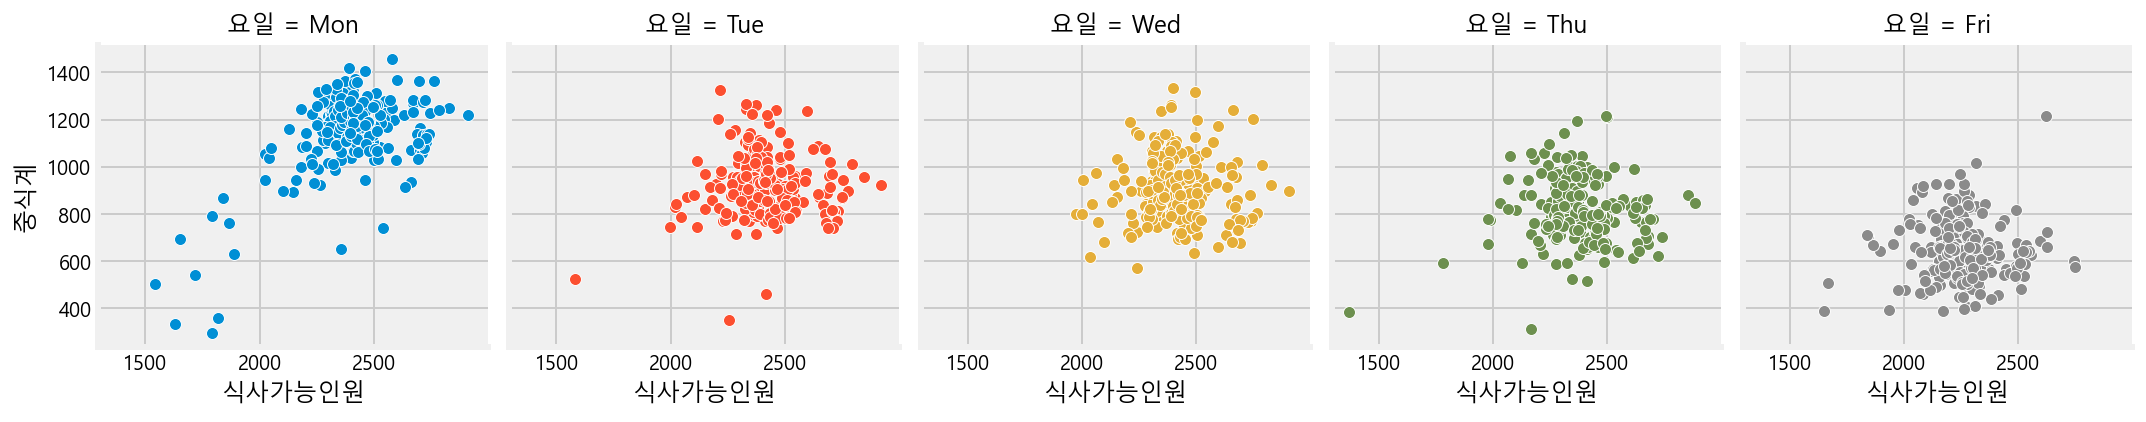

In [349]:
#plt.title('요일별 중식식사인원 / 식사가능인원')
grid = sns.FacetGrid(data=lmd, col='요일', hue = '요일')
grid.map(sns.scatterplot, '식사가능인원', '중식계')



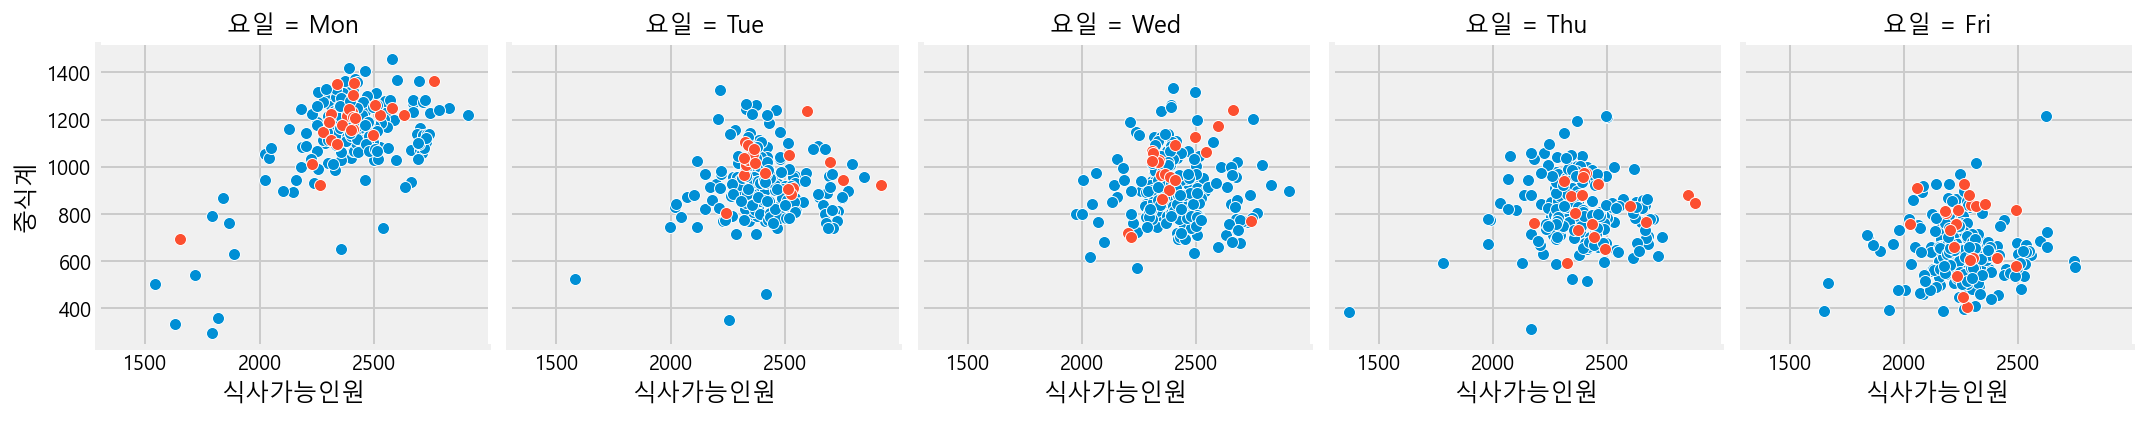

In [350]:
grid = sns.FacetGrid(data=lmd, col='요일',hue = '중식강수여부')
grid.map(sns.scatterplot, '식사가능인원', '중식계')

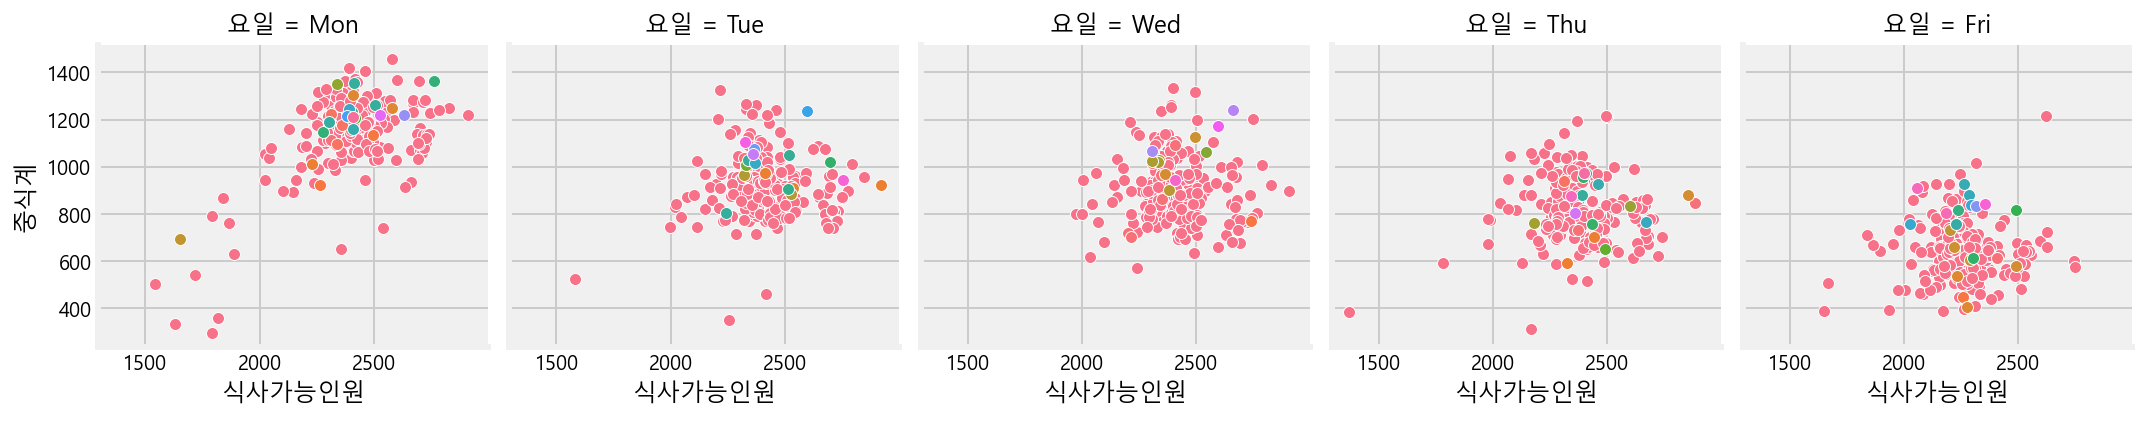

In [351]:
grid = sns.FacetGrid(data=lmd, col='요일',hue = '중식강수량')
grid.map(sns.scatterplot, '식사가능인원', '중식계')

In [352]:
lmd['중식강수량'].unique()

array([ 0. ,  9.4,  4.5,  3.4,  0.2,  1.1,  1. ,  1.7,  8.7,  2.3,  0.1,
       10.8,  3.8,  5.7,  0.3,  0.7,  9. ,  3.1,  0.8,  4.9,  3.2,  6.7,
        2.5,  2.8,  6.9,  1.4,  5.4,  0.6, 24. ,  3.5,  0.9,  4.2,  0.5,
        7. ,  0.4,  1.3,  6.4,  2. , 28.1,  3.6,  4. ,  3. ,  1.5,  1.9,
        7.2,  9.3,  6.8,  8.2,  4.6,  2.1,  4.4,  1.2,  1.8])

In [353]:
# 요일 카테고리화
ldf_mm['메뉴분류'] =  ldf_mm['메뉴분류'].astype('category')
ldf_mm['메뉴분류'] = ldf_mm.메뉴분류.cat.codes
# 월:3 , 화:4, 수:2, 목:1, 금:0

In [354]:
ldf_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일자           1205 non-null   object 
 1   요일           1205 non-null   object 
 2   본사정원수        1205 non-null   int64  
 3   본사휴가자수       1205 non-null   int64  
 4   본사출장자수       1205 non-null   int64  
 5   현본사소속재택근무자수  1205 non-null   float64
 6   중식계          1205 non-null   float64
 7   중식강수여부       1205 non-null   float64
 8   중식기온         1205 non-null   float64
 9   중식강수량        1205 non-null   float64
 10  확진자수         1205 non-null   float64
 11  휴일전날         1205 non-null   int64  
 12  휴일다음날        1205 non-null   int64  
 13  메뉴분류         1205 non-null   int8   
 14  국분류          1205 non-null   object 
 15  식사가능인원       1205 non-null   float64
dtypes: float64(7), int64(5), int8(1), object(3)
memory usage: 151.8+ KB


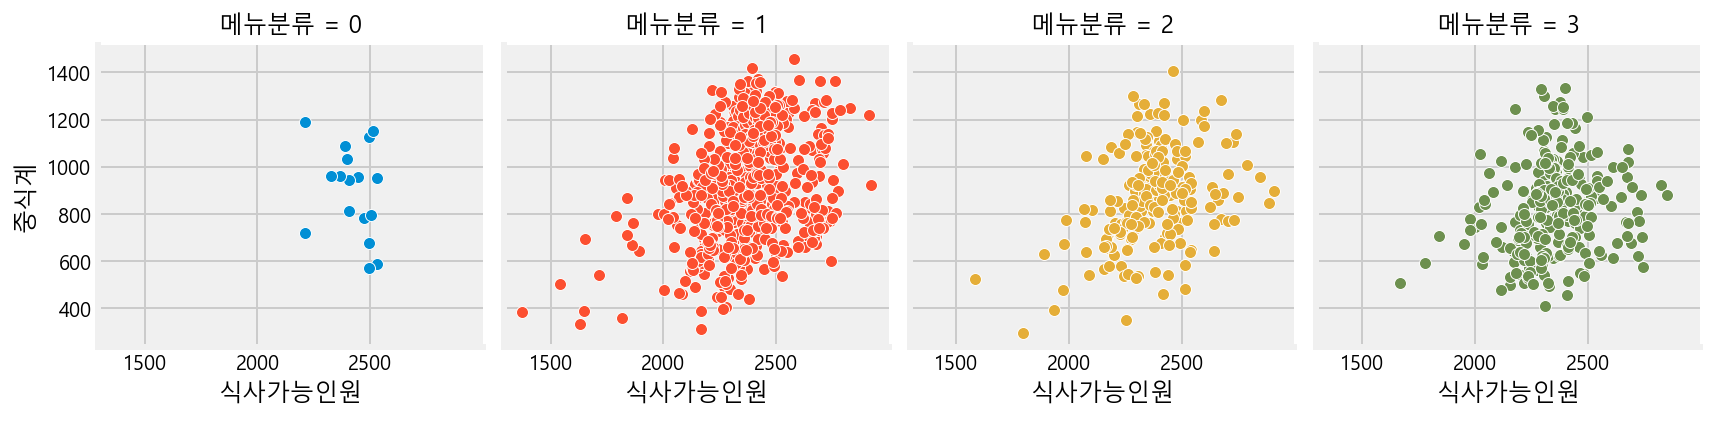

In [355]:
#plt.title('요일별 중식식사인원 / 식사가능인원')
grid = sns.FacetGrid(data=ldf_mm, col='메뉴분류', hue = '메뉴분류')
grid.map(sns.scatterplot, '식사가능인원', '중식계')

# 0-기타, 1-육류, 2:조류, 3-해산물

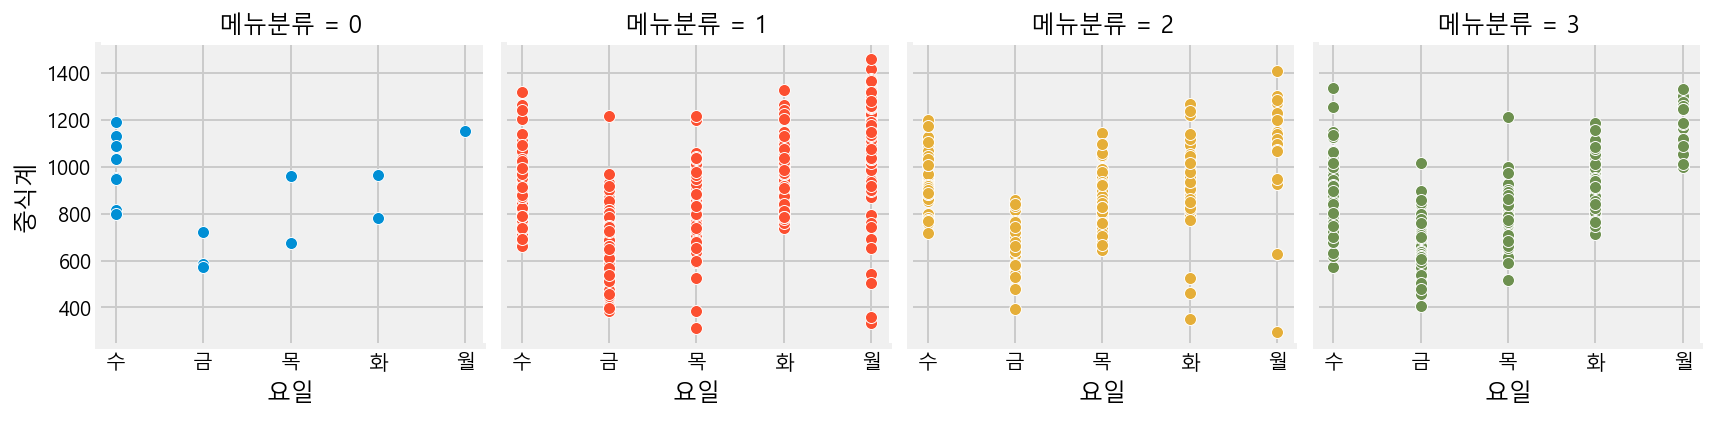

In [356]:
#plt.title('요일별 중식식사인원 / 식사가능인원')
grid = sns.FacetGrid(data=ldf_mm, col='메뉴분류', hue = '메뉴분류')
grid.map(sns.scatterplot, '요일', '중식계')

# 0-기타, 1-육류, 2:조류, 3-해산물

In [357]:
ldf_mm['국분류'].unique()

array(['찜', '찌개', '국수', '국', '탕', '스프', '우동'], dtype=object)

In [358]:
# 요일 카테고리화
ldf_mm['국분류'] =  ldf_mm['국분류'].astype('category')
ldf_mm['국분류'] = ldf_mm.국분류.cat.codes
# 월:3 , 화:4, 수:2, 목:1, 금:0
ldf_mm['국분류'].unique()

array([5, 4, 1, 0, 6, 2, 3], dtype=int8)

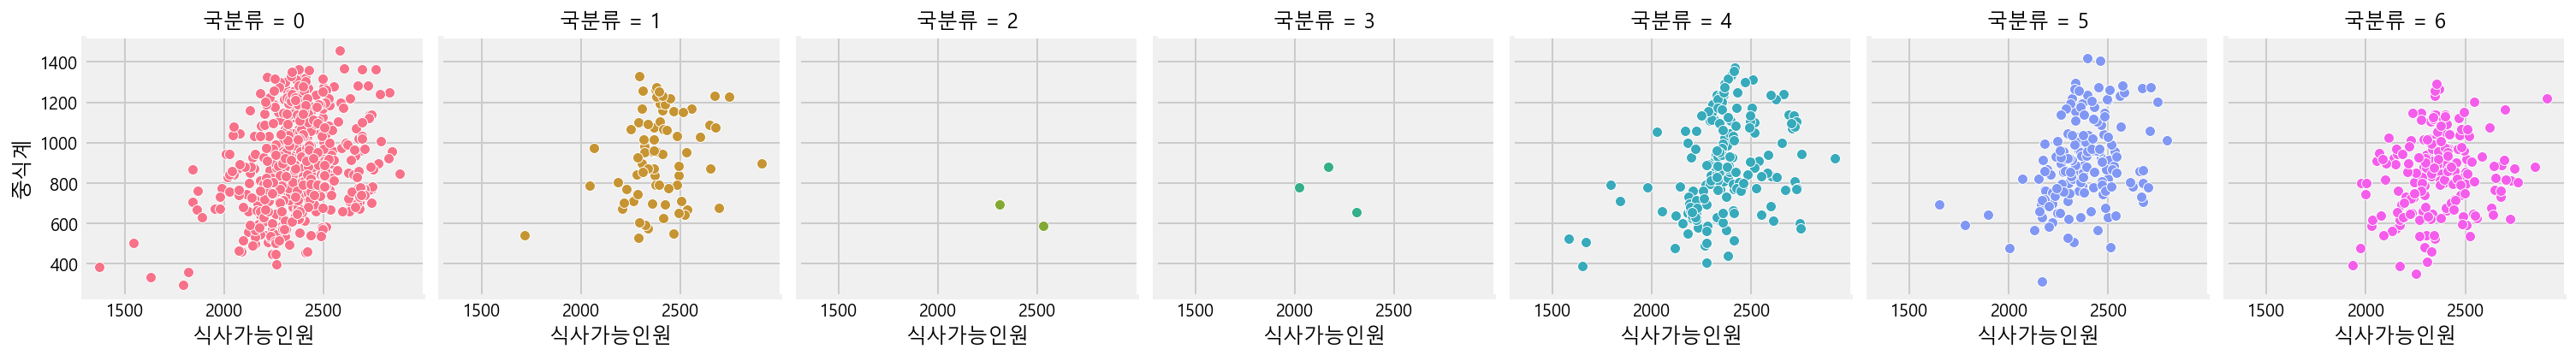

In [359]:
#plt.title('요일별 중식식사인원 / 식사가능인원')
grid = sns.FacetGrid(data=ldf_mm, col='국분류', hue = '국분류')
grid.map(sns.scatterplot, '식사가능인원', '중식계')

# 0-국, 1-국수, 2-스프, 3-우동, 4-찌개, 5-찜, 6-탕

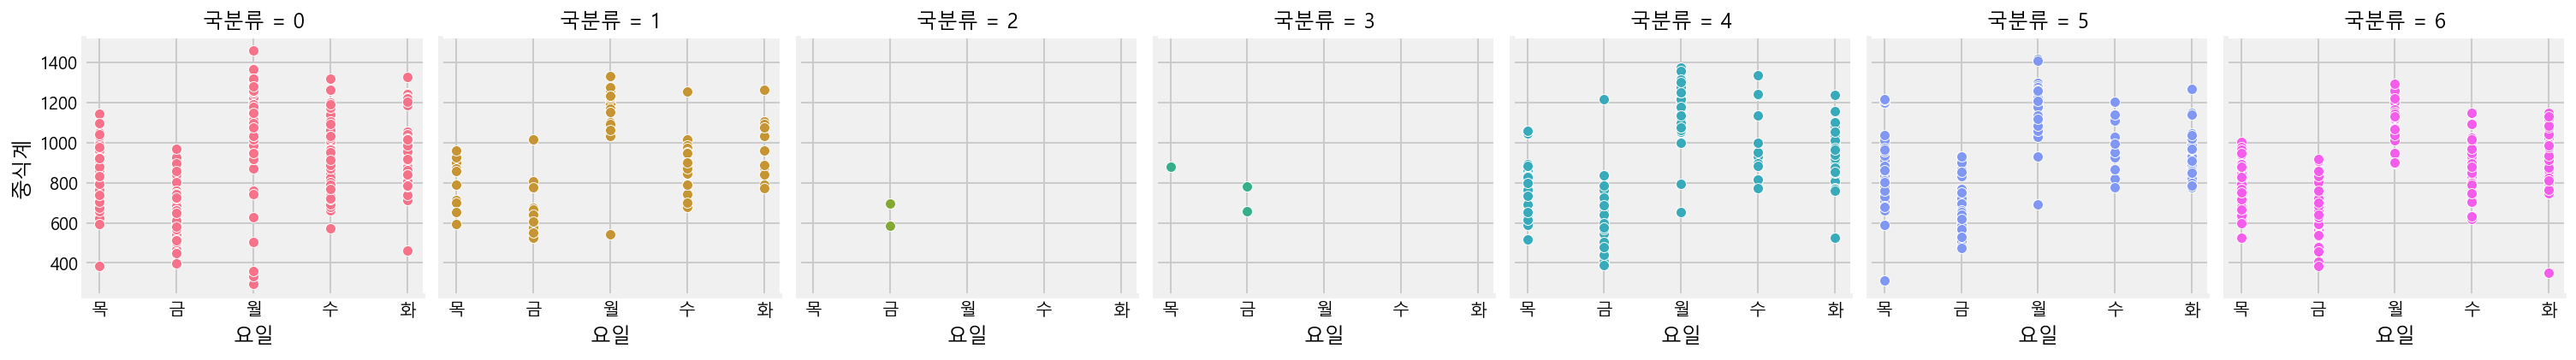

In [360]:
#plt.title('요일별 중식식사인원 / 식사가능인원')
grid = sns.FacetGrid(data=ldf_mm, col='국분류', hue = '국분류')
grid.map(sns.scatterplot, '요일', '중식계')

# 0-국, 1-국수, 2-스프, 3-우동, 4-찌개, 5-찜, 6-탕

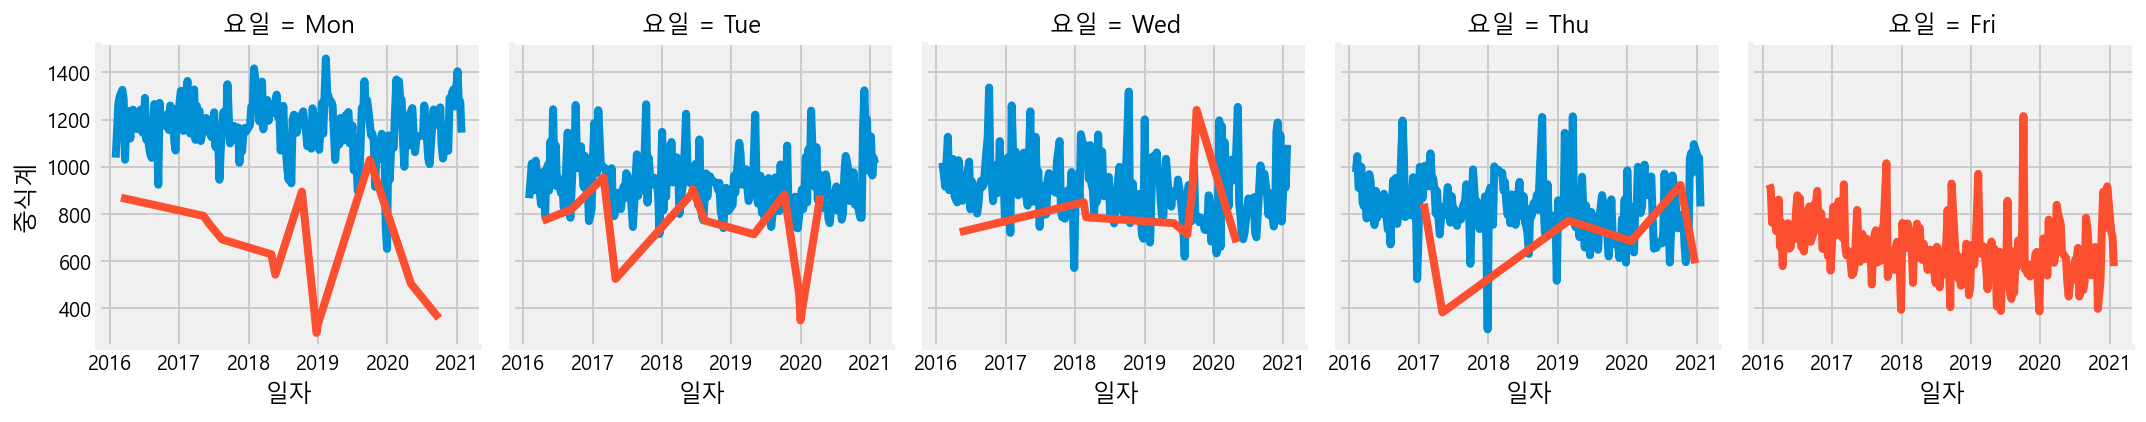

In [361]:
grid = sns.FacetGrid(data=lmd, col='요일', hue = '휴일전날')
grid.map(plt.plot, '일자', '중식계')

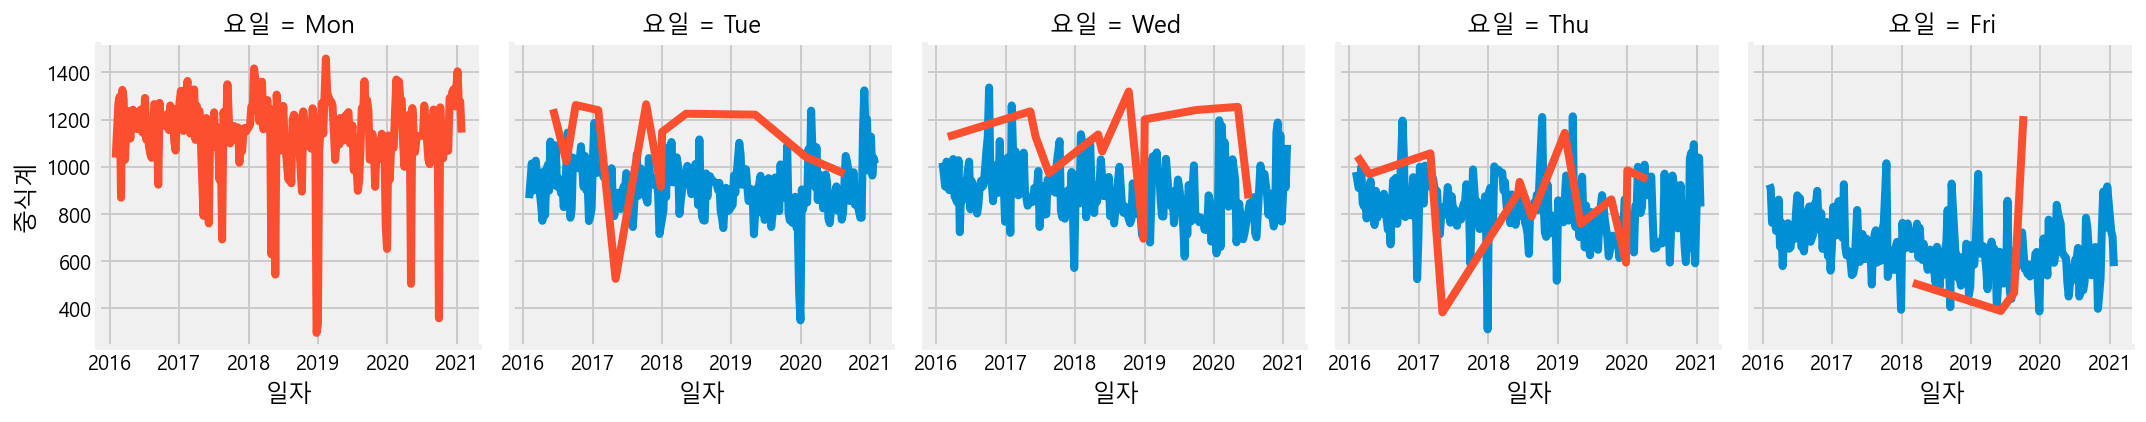

In [362]:
grid = sns.FacetGrid(data=lmd, col='요일', hue = '휴일다음날')
grid.map(plt.plot, '일자', '중식계')

<AxesSubplot:xlabel='요일', ylabel='중식계'>

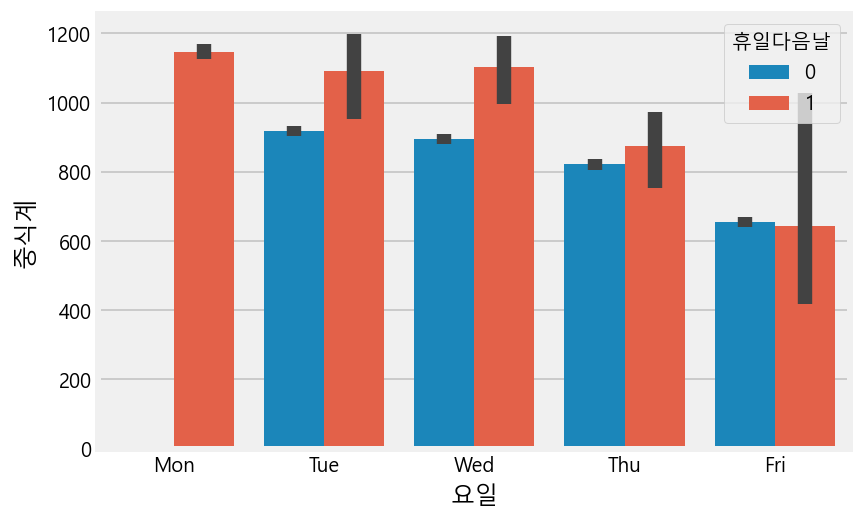

In [363]:
sns.barplot(data=lmd, x='요일', y ='중식계', hue='휴일다음날')


<AxesSubplot:xlabel='요일', ylabel='중식계'>

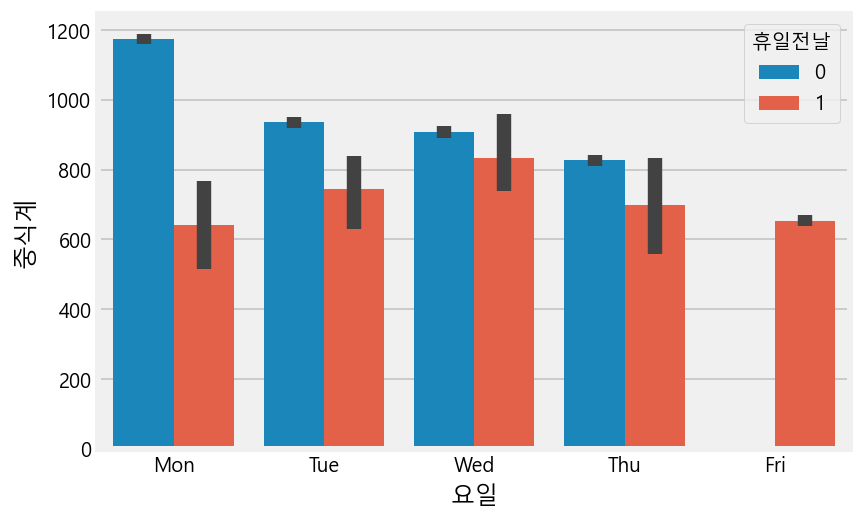

In [364]:
sns.barplot(data=lmd, x='요일', y ='중식계', hue='휴일전날')


In [365]:
# 요일 카테고리화
lmd['요일'] =  lmd['요일'].astype('category')
lmd['요일'] = lmd.요일.cat.codes
# 월:3 , 화:4, 수:2, 목:1, 금:0

In [366]:
lmd.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,...,국분류_국,국분류_국수,국분류_스프,국분류_우동,국분류_찌개,국분류_찜,국분류_탕,연,월,일
0,2016-02-01,1,2601,50,150,0.0,1039.0,0.0,3.0,0.0,...,0,0,0,0,0,1,0,2016,2,1
1,2016-02-02,3,2601,50,173,0.0,867.0,0.0,1.7,0.0,...,0,0,0,0,1,0,0,2016,2,2
2,2016-02-03,4,2601,56,180,0.0,1017.0,0.0,3.2,0.0,...,0,1,0,0,0,0,0,2016,2,3
3,2016-02-04,2,2601,104,220,0.0,978.0,0.0,3.7,0.0,...,1,0,0,0,0,0,0,2016,2,4
4,2016-02-05,0,2601,278,181,0.0,925.0,0.0,6.3,0.0,...,1,0,0,0,0,0,0,2016,2,5


## 훈련데이터 분할 메뉴분류 포함

In [367]:
X = lmd.drop(['일자', '중식계', '중식강수여부', '중식기온', '휴일다음날', '연', '월', '일'], axis=1) # 독립변수 X
y = lmd['중식계']      # 종속변수 y

#train data 와 test data로 구분 7:3 비율
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # 독립변수
    y,                  # 종속변수
    test_size=0.3,      # 검증 30%
    random_state=10     # 랜덤 추출 값
)

In [368]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(843, 20) (362, 20)
(843,) (362,)


In [369]:
X_train.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식강수량,확진자수,휴일전날,식사가능인원,메뉴분류_기타,메뉴분류_육류,메뉴분류_조류,메뉴분류_해산물,국분류_국,국분류_국수,국분류_스프,국분류_우동,국분류_찌개,국분류_찜,국분류_탕
448,3,2644,112,265,0.0,0.0,0.0,0,2267.0,0,1,0,0,0,0,0,0,0,0,1
684,0,2815,222,305,0.0,0.0,0.0,1,2288.0,0,1,0,0,0,1,0,0,0,0,0


In [370]:
import statsmodels.api as sm
lr = sm.OLS(y,X)
result= lr.fit() 
print(result.summary())
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                    중식계   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          3.33e-287
Time:                        16:59:48   Log-Likelihood:                -7443.9
No. Observations:                1205   AIC:                         1.492e+04
Df Residuals:                    1187   BIC:                         1.502e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
요일            -41.0806      3.246    -12.655      

## 모델링

### 라쏘모델

In [372]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
# 라쏘와 리지모델에서 alpha값은 규제정도를 나타냄, alpha값을 높이면 규제를 강하게 함.
from sklearn.linear_model import Lasso

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_lasso = Lasso(alpha=alphavalue)
    model_lasso.fit(X_train, y_train)
    print(model_lasso.score(X_test, y_test))

0.6783879772445838
0.6826438472902676
0.5596962247879321


### 리지모델

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
from sklearn.linear_model import Ridge

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_ridge = Ridge(alpha=alphavalue)
    model_ridge.fit(X_train, y_train)
    print(model_ridge.score(X_test, y_test))

0.6831346317304388
0.6829898814558447
0.6469173382542204


### 앙상블

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred1 = model_RF.predict(X_test)

In [ ]:
print(model_RF.score(X_test, y_test))

0.8024260052713899


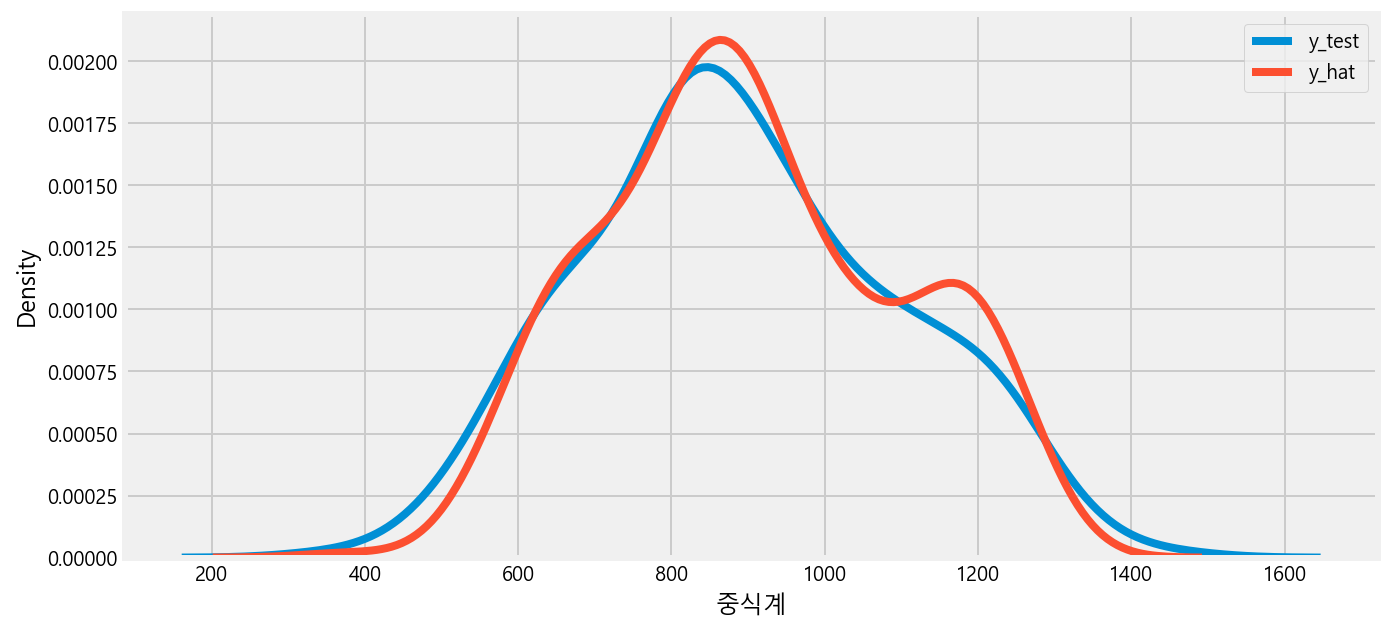

In [ ]:
y_hat = pred1

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## XGBoost

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 1, 'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 300}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [ ]:
y_pred = grid_search.predict(X_test)

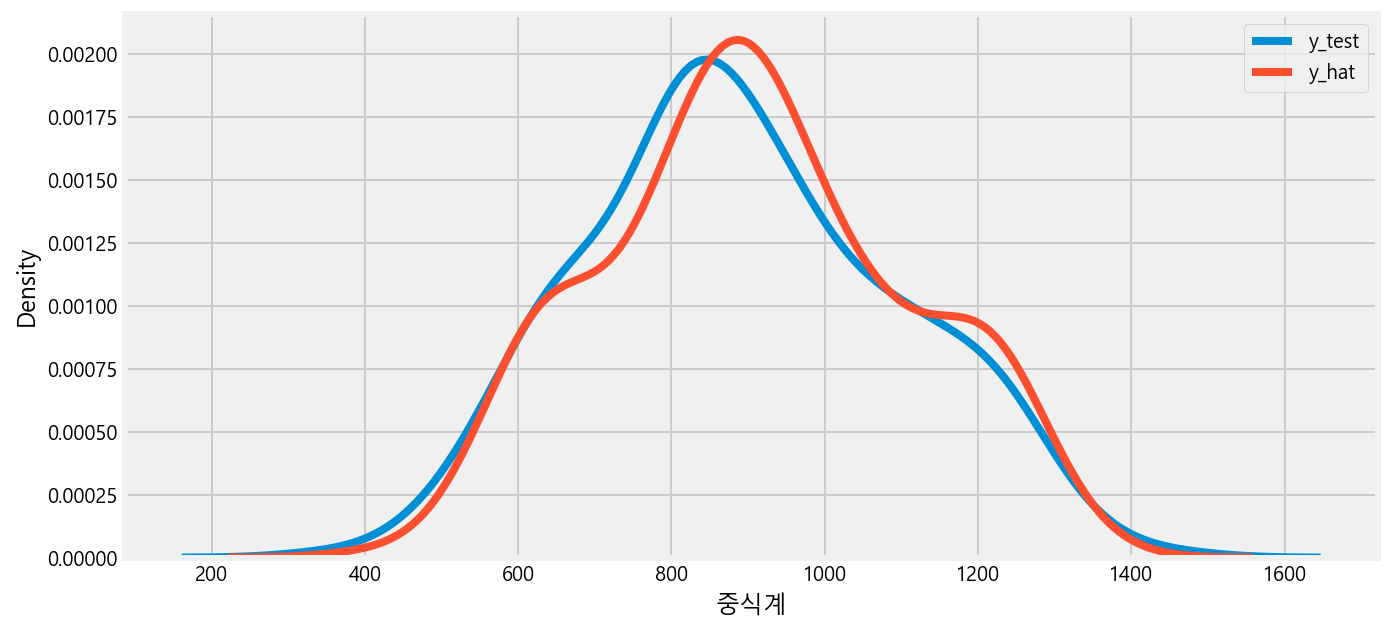

In [ ]:
y_hat = y_pred

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## 메뉴제외 분석

In [ ]:
lmd.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '현본사소속재택근무자수', '중식계', '중식강수여부',
       '중식기온', '중식강수량', '확진자수', '휴일전날', '휴일다음날', '메뉴분류_기타', '메뉴분류_육류',
       '메뉴분류_조류', '메뉴분류_해산물', '국분류_국', '국분류_국수', '국분류_스프', '국분류_우동', '국분류_찌개',
       '국분류_찜', '국분류_탕', '연', '월', '일', '식사가능인원'],
      dtype='object')

In [ ]:
X = lmd.drop(['일자', '메뉴분류_기타', '메뉴분류_육류','메뉴분류_조류', '메뉴분류_해산물', '국분류_국', '국분류_국수', '국분류_스프', '국분류_우동', '국분류_찌개','국분류_찜', '국분류_탕'], axis=1) # 독립변수 X
y = lmd['중식계']      # 종속변수 y

#train data 와 test data로 구분 7:3 비율
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # 독립변수
    y,                  # 종속변수
    test_size=0.3,      # 검증 30%
    random_state=10     # 랜덤 추출 값
)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(843, 16) (362, 16)
(843,) (362,)


In [ ]:
X_train.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,중식계,중식강수여부,중식기온,중식강수량,확진자수,휴일전날,휴일다음날,연,월,일,식사가능인원
448,3,2644,112,265,0.0,929.0,0.0,16.3,0.0,0.0,0,0,2017,11,28,2267.0
684,0,2815,222,305,0.0,527.0,0.0,8.6,0.0,0.0,1,0,2018,11,23,2288.0


In [ ]:
import statsmodels.api as sm
lr = sm.OLS(y,X)
result= lr.fit() 
print(result.summary())
print(result.params)

                                 OLS Regression Results                                
Dep. Variable:                    중식계   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.035e+30
Date:                Thu, 30 Sep 2021   Prob (F-statistic):                        0.00
Time:                        16:35:35   Log-Likelihood:                          29079.
No. Observations:                1205   AIC:                                 -5.813e+04
Df Residuals:                    1190   BIC:                                 -5.805e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## 모델링

### 라쏘

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
# 라쏘와 리지모델에서 alpha값은 규제정도를 나타냄, alpha값을 높이면 규제를 강하게 함.
from sklearn.linear_model import Lasso

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_lasso = Lasso(alpha=alphavalue)
    model_lasso.fit(X_train, y_train)
    print(model_lasso.score(X_test, y_test))

0.9999999740798421
0.9999999998722433
0.9999950408648826


### 리지모델

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
from sklearn.linear_model import Ridge

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_ridge = Ridge(alpha=alphavalue)
    model_ridge.fit(X_train, y_train)
    print(model_ridge.score(X_test, y_test))

0.999999999999997
1.0
0.9999999999793692


### 앙상블

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred1 = model_RF.predict(X_test)

In [ ]:
print(model_RF.score(X_test, y_test))

0.999668583319445


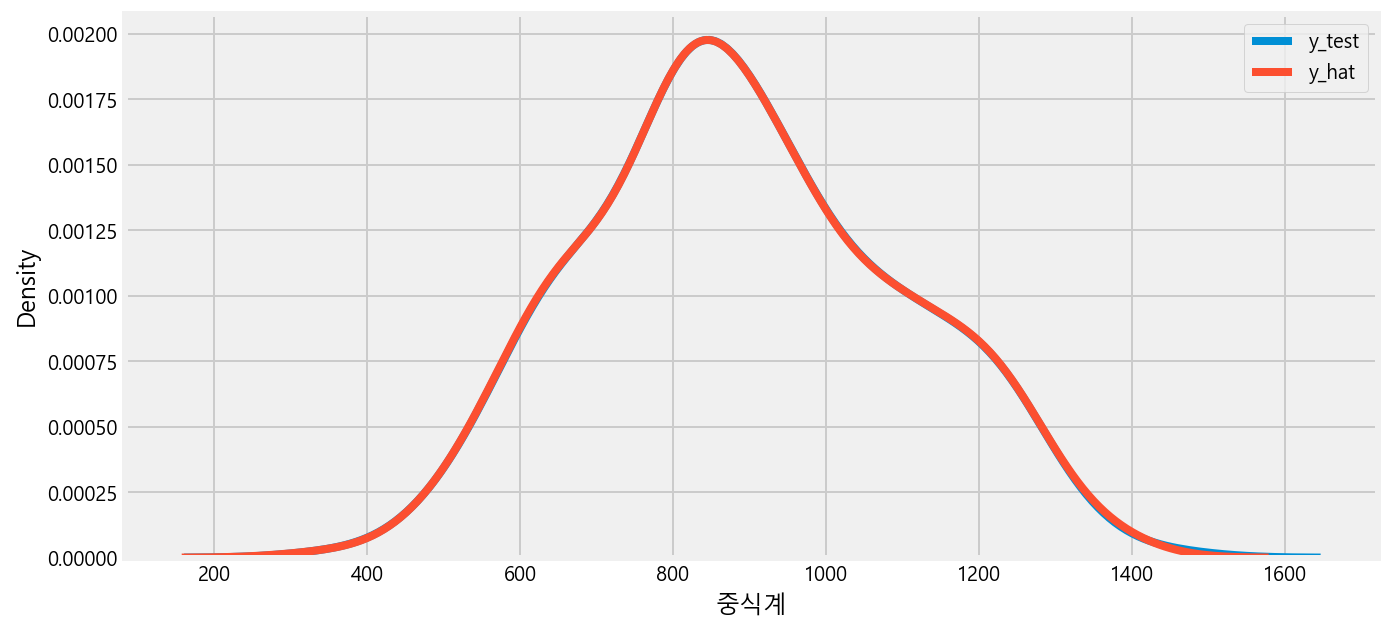

In [ ]:
y_hat = pred1

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## XGBoost

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'max_depth': 4, 'n_estimators': 500}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [ ]:
y_pred = grid_search.predict(X_test)

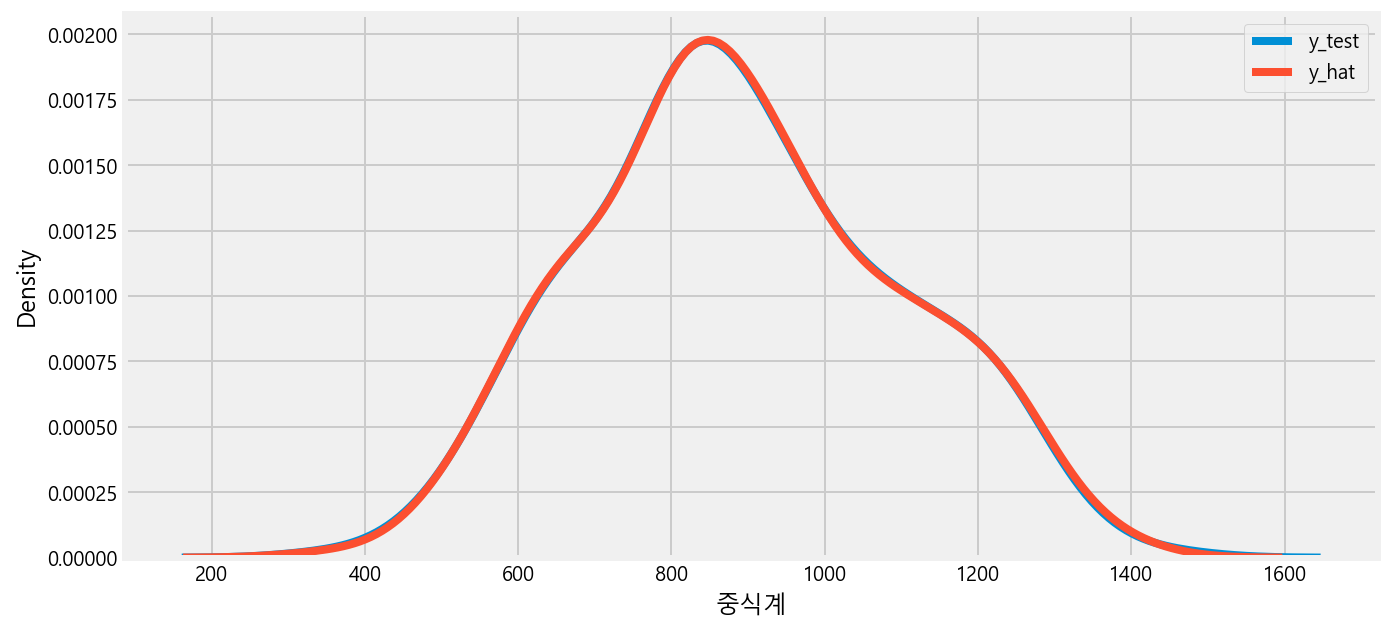

In [ ]:
y_hat = y_pred

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## 표준화

### 메뉴분류 포함

In [ ]:
X = lmd.drop(['일자', '중식계', '중식강수여부', '중식기온', '휴일다음날', '연', '월', '일'], axis=1) # 독립변수 X
y = lmd['중식계']      # 종속변수 y

# Scaling the data and building the models.

from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
SE.fit(X_train)
X_train = SE.transform(X_train)
X_test = SE.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(903, 20) (302, 20)
(903,) (302,)


In [ ]:
import statsmodels.api as sm
lr = sm.OLS(y,X)
result= lr.fit() 
print(result.summary())
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                    중식계   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          3.33e-287
Time:                        16:37:24   Log-Likelihood:                -7443.9
No. Observations:                1205   AIC:                         1.492e+04
Df Residuals:                    1187   BIC:                         1.502e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
요일            -41.0806      3.246    -12.655      

## 모델링

### 라쏘

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
# 라쏘와 리지모델에서 alpha값은 규제정도를 나타냄, alpha값을 높이면 규제를 강하게 함.
from sklearn.linear_model import Lasso

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_lasso = Lasso(alpha=alphavalue)
    model_lasso.fit(X_train, y_train)
    print(model_lasso.score(X_test, y_test))

0.6231815972457406
0.621857824487559
0.1238584967646369


### 리지

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
from sklearn.linear_model import Ridge

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_ridge = Ridge(alpha=alphavalue)
    model_ridge.fit(X_train, y_train)
    print(model_ridge.score(X_test, y_test))

0.6218120172941568
0.6216665627354574
0.6240512087898622


### 앙상블

In [ ]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred1 = model_RF.predict(X_test)

In [ ]:
print(model_RF.score(X_test, y_test))

0.760292379070702


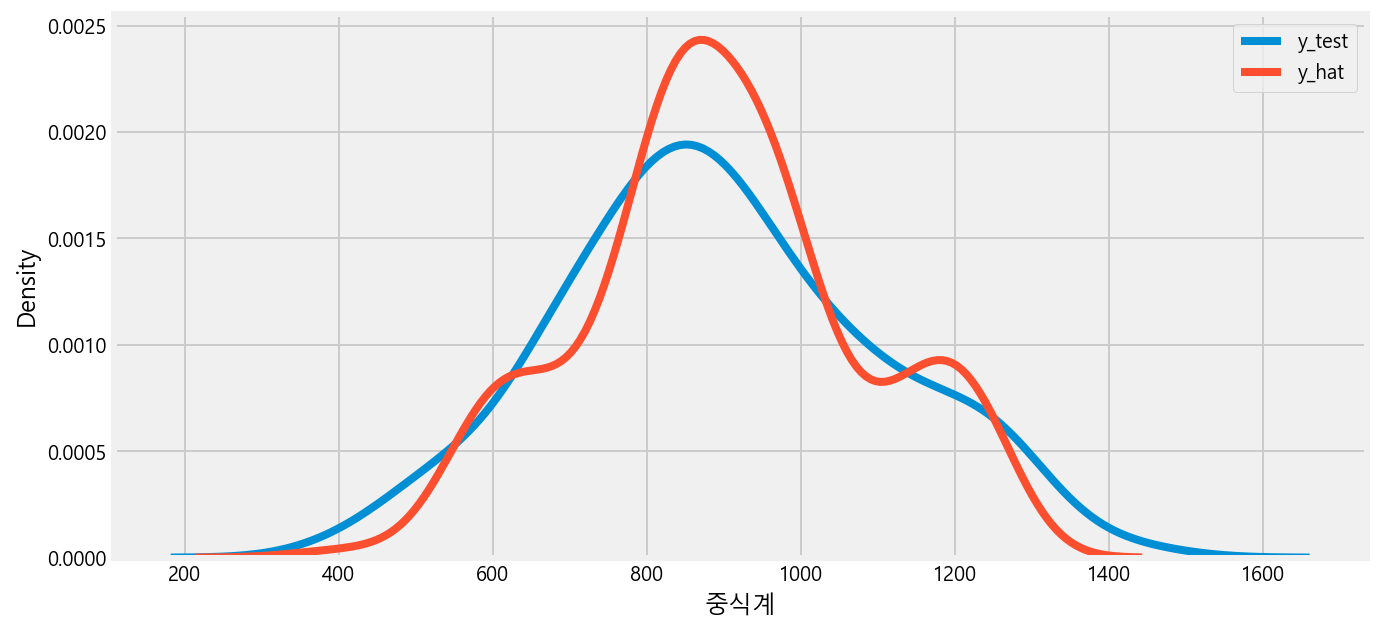

In [ ]:
y_hat = pred1

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## XGB

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 0.5, 'colsample_bytree': 1, 'max_depth': 2, 'n_estimators': 300}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [ ]:
y_pred = grid_search.predict(X_test)

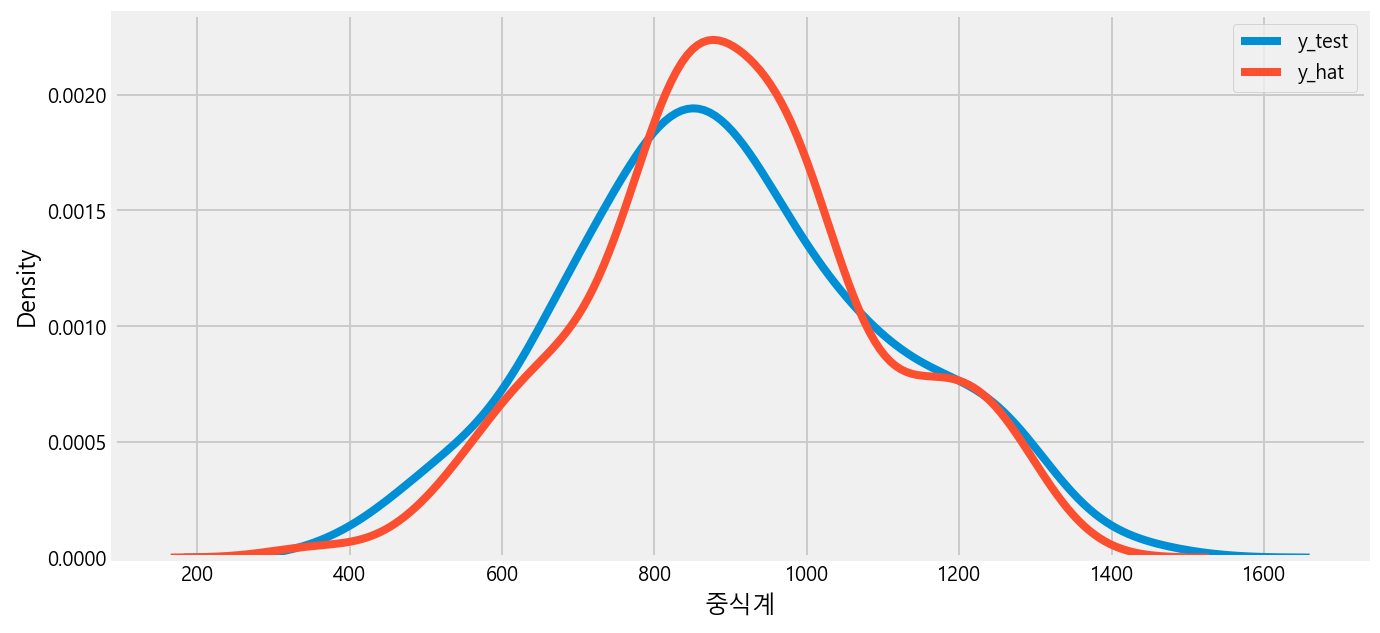

In [ ]:
y_hat = y_pred

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## 메뉴분류 제외

In [ ]:
X = lmd.drop(['일자', '메뉴분류_기타', '메뉴분류_육류','메뉴분류_조류', '메뉴분류_해산물', '국분류_국', '국분류_국수', '국분류_스프', '국분류_우동', '국분류_찌개','국분류_찜', '국분류_탕'], axis=1) # 독립변수 X
y = lmd['중식계']      # 종속변수 y


# Scaling the data and building the models.

from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
SE.fit(X_train)
X_train = SE.transform(X_train)
X_test = SE.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(903, 16) (302, 16)
(903,) (302,)


In [ ]:
import statsmodels.api as sm
lr = sm.OLS(y,X)
result= lr.fit() 
print(result.summary())
print(result.params)

                                 OLS Regression Results                                
Dep. Variable:                    중식계   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.035e+30
Date:                Thu, 30 Sep 2021   Prob (F-statistic):                        0.00
Time:                        16:38:59   Log-Likelihood:                          29079.
No. Observations:                1205   AIC:                                 -5.813e+04
Df Residuals:                    1190   BIC:                                 -5.805e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## 모델링

라쏘

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
# 라쏘와 리지모델에서 alpha값은 규제정도를 나타냄, alpha값을 높이면 규제를 강하게 함.
from sklearn.linear_model import Lasso

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_lasso = Lasso(alpha=alphavalue)
    model_lasso.fit(X_train, y_train)
    print(model_lasso.score(X_test, y_test))

0.9999771725797982
0.999999771725798
0.7717257979825685


### 리지

In [ ]:
# 여러개의 x변수중 영향력이 작은(회귀계수값이 작은)변수는 취급하지 않음
from sklearn.linear_model import Ridge

alphaList=[1.0, 0.1, 100]

for alphavalue in alphaList:
    model_ridge = Ridge(alpha=alphavalue)
    model_ridge.fit(X_train, y_train)
    print(model_ridge.score(X_test, y_test))

0.9999918815754318
0.9999999174359274
0.9764244697433602


### 앙상블

In [ ]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred1 = model_RF.predict(X_test)

In [ ]:
print(model_RF.score(X_test, y_test))

0.9991612454437582


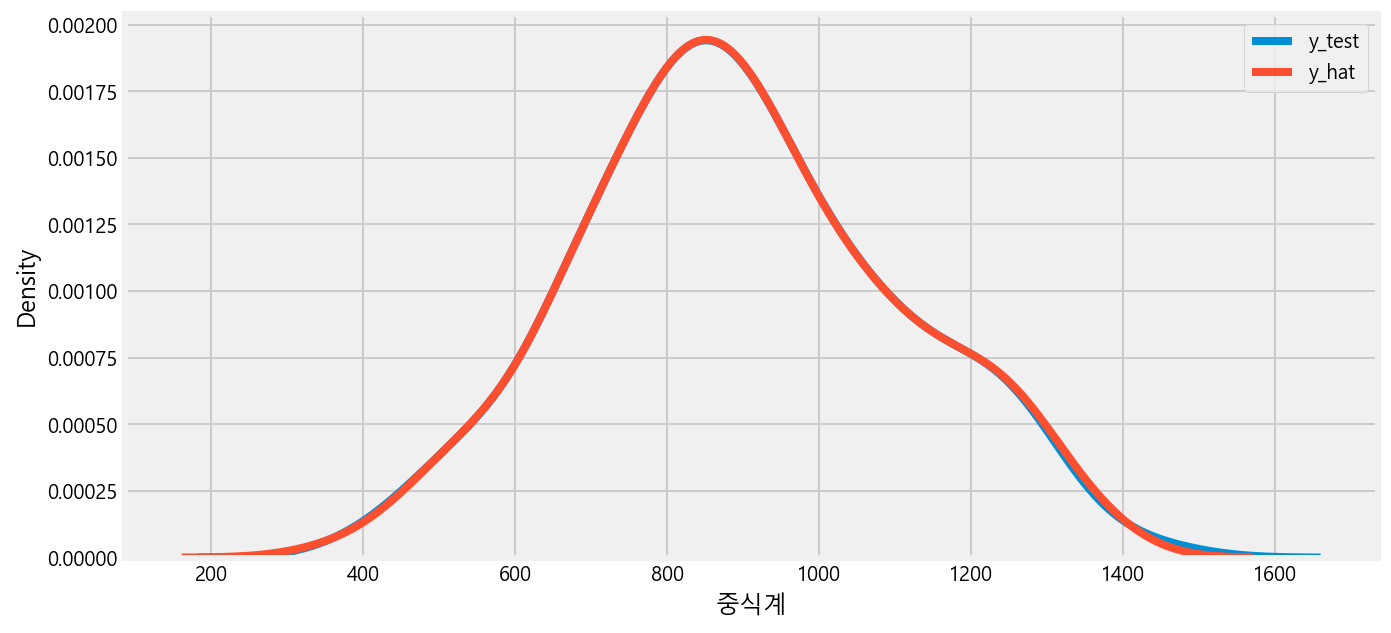

In [ ]:
y_hat = pred1

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## XGB

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'max_depth': 2, 'n_estimators': 500}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=600, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=True, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=None)

In [ ]:
y_pred = grid_search.predict(X_test)

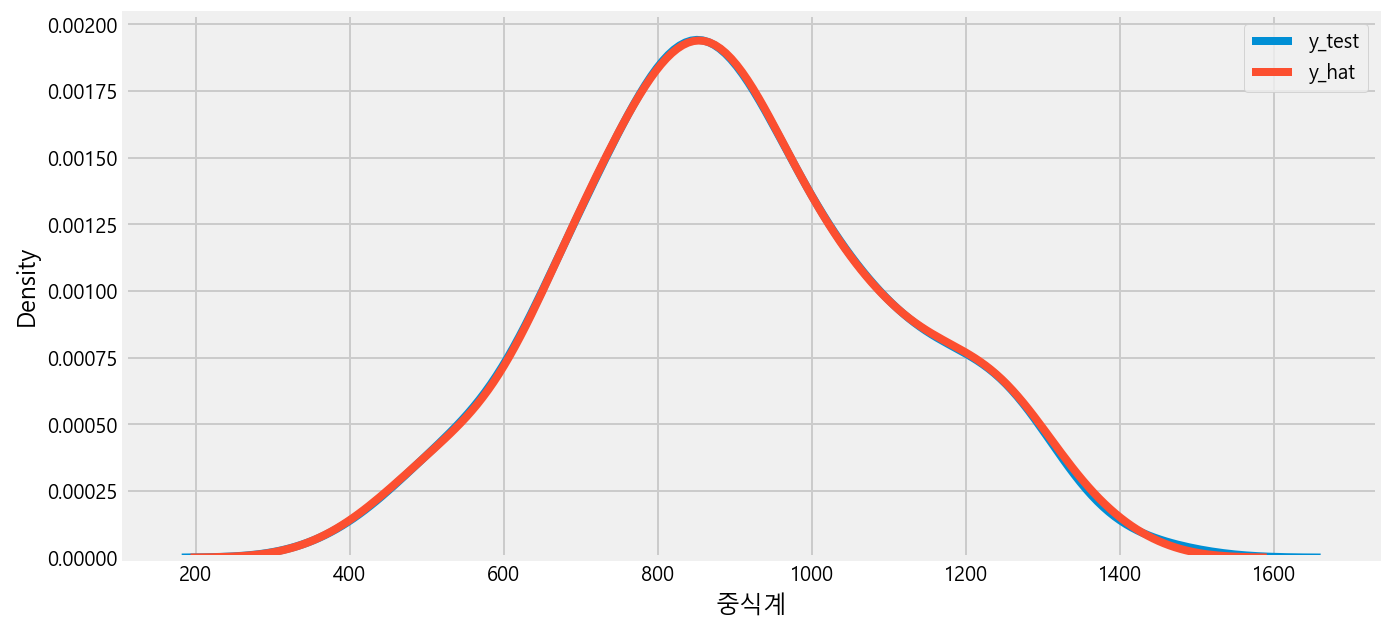

In [ ]:
y_hat = y_pred

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()